In [64]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
campaign_data = pd.read_csv('data/campaign-data-processed.csv')

##### Numero di impression per cookie

In [66]:
campaign_data_impressions = campaign_data.copy()
campaign_data_impressions['total_impressions'].describe()

count    82564.000000
mean         5.458941
std          5.335773
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        245.000000
Name: total_impressions, dtype: float64

([<matplotlib.axis.YTick at 0x19ecf817a00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

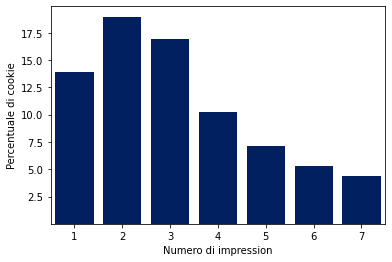

In [67]:
campaign_data_tot_impressions = campaign_data.copy()

x = campaign_data_tot_impressions[campaign_data_tot_impressions['total_impressions'] <= 7]['total_impressions'].value_counts()
y = round(x / 82564 * 100, 3).tolist()

plt.xticks(range(1, 8))
plt.xlabel('Numero di impression')
plt.ylabel('Percentuale di cookie')
plt.bar(x.index.tolist(), y, color = '#012060')

plt.xlim(0.5, 7.5)
y_ticks = plt.yticks()[0]
plt.yticks([tick for tick in y_ticks if tick != 0 and tick != max(y_ticks)])

In [68]:
campaign_data_tot_impressions[campaign_data_tot_impressions['clicks'] ==1] 

,os_id,browser_id,device_type_id,clicks,total_impressions,impressions_workday_morning,impressions_workday_afternoon,impressions_workday_evening,impressions_workday_night,impressions_weekend_morning,...,pets,realestate,religionandspirituality,science,shopping,society,sports,styleandfashion,technologyandcomputing,travel
96,os_G,browser_B,device_B,1,4,0,1,1,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
485,os_G,browser_B,device_B,1,4,0,1,3,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.00
502,os_G,browser_B,device_B,1,7,0,0,3,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
763,os_A,browser_B,device_A,1,14,1,8,2,2,1,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
1059,os_A,browser_A,device_A,1,6,0,0,0,0,0,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80814,os_F,browser_B,device_C,1,11,0,0,2,8,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
81414,os_G,browser_B,device_B,1,3,0,0,0,0,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.00
81420,os_A,browser_B,device_A,1,4,0,1,0,2,0,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
81923,os_G,browser_F,device_B,1,4,3,1,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


##### Total impressions == 1

In [69]:
campaign_data_tot_impressions_1 = campaign_data_tot_impressions[campaign_data_tot_impressions['clicks'] >= 1]

<BarContainer object of 7 artists>

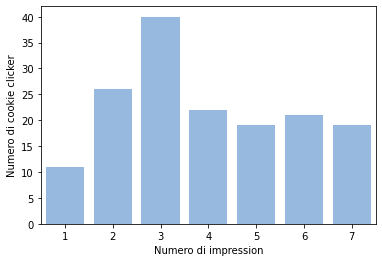

In [70]:
x_1 = campaign_data_tot_impressions_1[campaign_data_tot_impressions_1['total_impressions'] <= 7]['total_impressions'].value_counts()
len(x_1.index.tolist())
plt.xlim(0.5, 7.5) 
plt.xticks(range(1, 8))
plt.xlabel('Numero di impression')
plt.ylabel('Numero di cookie clicker')
plt.bar(x_1.index.tolist(), x_1.values.tolist(),  color='#97b9e0')

### Impressions

In [71]:
campaign_data_impressions = campaign_data.copy()

In [72]:
impressions = campaign_data_impressions.loc[:, 'total_impressions':'impressions_weekend_night'].copy()

In [73]:
impressions_workday = impressions.loc[:, 'impressions_workday_morning':'impressions_workday_night']
impressions_weekend = impressions.loc[:, 'impressions_weekend_morning':'impressions_weekend_night']

In [74]:
total_impressions = impressions.loc[:, 'total_impressions']
total_impressions_workday = impressions_workday.sum().sum()
total_impressions_weekend = impressions_weekend.sum().sum()

In [75]:
impressions_workday['impressions_workday_morning'].sum()

62736

##### Impressions workday/weekend

In [76]:
ratio_workday = (total_impressions_workday) / (total_impressions.sum())
ratio_weekend = (total_impressions_weekend) / (total_impressions.sum())

#### Impression workday

In [80]:
moment = ['Mattina', 'Pomeriggio', 'Sera', 'Notte']

n_impressions_workday = [impressions_workday['impressions_workday_morning'].sum(),
                        impressions_workday['impressions_workday_afternoon'].sum(),
                        impressions_workday['impressions_workday_evening'].sum(),
                        impressions_workday['impressions_workday_night'].sum()]

n_impressions_weekend = [impressions_weekend['impressions_weekend_morning'].sum(),
                        impressions_weekend['impressions_weekend_afternoon'].sum(),
                        impressions_weekend['impressions_weekend_evening'].sum(),
                        impressions_weekend['impressions_weekend_night'].sum()]

In [82]:
larghezza_barre = 0.25
posizioni = np.arange(len(moment))

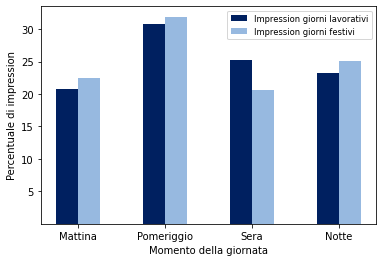

In [83]:
# Creazione del grafico a barre
fig, ax = plt.subplots()

bar1 = ax.bar(posizioni, n_impressions_workday / sum(n_impressions_workday) * 100, larghezza_barre, label='Impression giorni lavorativi', color='#002060')
bar2 = ax.bar(posizioni + larghezza_barre, n_impressions_weekend / sum(n_impressions_weekend) * 100, larghezza_barre, label='Impression giorni festivi', color='#97b9e0')

# Aggiunta delle etichette degli assi e del titolo
ax.set_xlabel('Momento della giornata')
ax.set_ylabel('Percentuale di impression')

# Aggiunta delle etichette delle categorie sull'asse x
ax.set_xticks(posizioni + larghezza_barre / 2)
ax.set_xticklabels(moment)

# Aggiunta della legenda
ax.legend(fontsize='small')

y_ticks = plt.yticks()[0]
plt.yticks([tick for tick in y_ticks if tick != 0 and tick != max(y_ticks)])

# Visualizzazione del grafico
plt.show()

In [84]:
display_impressions_workday = {'workday_moment': ['Mattina', 'Pomeriggio', 'Sera', 'Notte'],
                               'number_of_impressions': [impressions_workday['impressions_workday_morning'].sum(),
                                                         impressions_workday['impressions_workday_afternoon'].sum(),
                                                         impressions_workday['impressions_workday_evening'].sum(),
                                                         impressions_workday['impressions_workday_night'].sum()]}
display_impressions_workday = pd.DataFrame(display_impressions_workday)

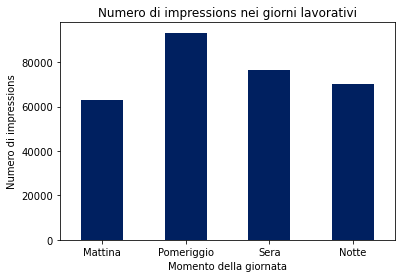

In [85]:
# Creazione del bar chart
plot_impressions_workday = display_impressions_workday.plot.bar(x='workday_moment', y='number_of_impressions', rot=0, color='#002060')

plot_impressions_workday.legend().remove()

# Personalizzazione del grafico
plt.title('Numero di impressions nei giorni lavorativi')
plt.xlabel('Momento della giornata')
plt.ylabel('Numero di impressions')

# Visualizzazione del grafico
plt.show()

#### Categorie

In [98]:
categories = campaign_data.loc[:, 'artandentertainment':'travel'].copy()

In [106]:
top = categories.mean(axis=0).sort_values(ascending=False).head(7) * 100

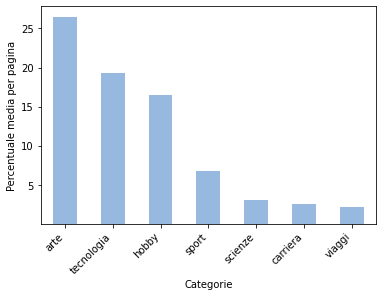

In [112]:
fig, ax = plt.subplots()
top.plot.bar(ax=ax, color='#97b9df')

list_categories = ['arte', 'tecnologia', 'hobby', 'sport', 'scienze', 'carriera', 'viaggi']

plt.xlabel('Categorie')
plt.ylabel('Percentuale media per pagina')

ax.set_xticklabels(list_categories, rotation=45, ha='right')

y_ticks = plt.yticks()[0]
plt.yticks([tick for tick in y_ticks if tick != 0 and tick != max(y_ticks)])

plt.show()


##### Grafici dei decili (Random Forest e Mahalanobis)

In [108]:
deciles_testing = pd.read_csv('data/deciles-testing-mahalanobis.csv')

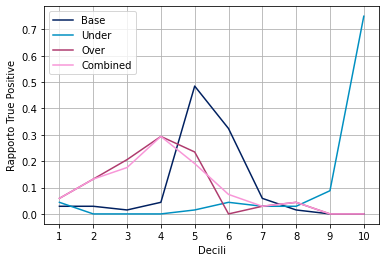

In [109]:
deciles_testing_pos = deciles_testing.drop(['ratio_neg_basic', 'ratio_neg_nm1', 'ratio_neg_smote','ratio_neg_smoteenn'], axis = 1)

ax = deciles_testing_pos.plot(
    x = 'decile_interval',
    y = ['ratio_pos_basic', 'ratio_pos_nm1', 'ratio_pos_smote', 'ratio_pos_smoteenn'], 
    kind = 'line',
    color = ['#002060', '#0090C1', '#AF3B6E', '#F896D8', '#DE9E36']
)

ax.legend(['Base', 'Under', 'Over', 'Combined'])

plt.xticks([1,2,3,4,5,6,7,8,9,10])

plt.xlabel('Decili')
plt.ylabel('Rapporto True Positive')

plt.grid(True)

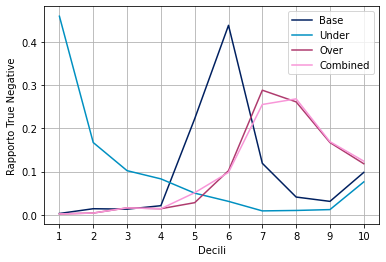

In [110]:
deciles_testing_neg = deciles_testing.drop(['ratio_pos_basic', 'ratio_pos_nm1', 'ratio_pos_smote','ratio_pos_smoteenn'], axis = 1)

ax = deciles_testing_neg.plot(
    x = 'decile_interval',
    y = ['ratio_neg_basic', 'ratio_neg_nm1', 'ratio_neg_smote', 'ratio_neg_smoteenn'], 
    kind = 'line',
    color = ['#002060', '#0090C1', '#AF3B6E', '#F896D8', '#DE9E36']
)

ax.legend(['Base', 'Under', 'Over', 'Combined'])

plt.xticks([1,2,3,4,5,6,7,8,9,10])

plt.xlabel('Decili')
plt.ylabel('Rapporto True Negative')

plt.grid(True)